# Red Wine Quality
Coursera Advanced Data Science Capstone Project

## Modelling


### 1 - Load the data
We now load the data as prepared by our ETL pipeline, so our data is normalized and the target variable is one-hot encoded

In [1]:
!conda install scikit-learn=0.22

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - scikit-learn=0.22


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    mkl-2020.1                 |              217       200.5 MB
    mkl-service-2.3.0          |   py36he904b0f_0         208 KB
    scikit-learn-0.22.1        |   py36hd81dba3_0         7.1 MB
    joblib-0.14.1              |             py_0         202 KB
    ------------------------------------------------------------
                                           Total:       208.0 MB

The following NEW packages will be INSTALLED:

    joblib:       0.14.1-py_0          

The following packages will be UPDATED:

    mkl:          2019.1-144            --> 2020.1-217           
    mkl-service:  1.1.2-py36he904b0f_5  --> 2.3.0-py36he904b0f_0 
    scikit-learn: 0.20.3-py36hd81dba3_0 --> 0.22.1-py36

In [2]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, ParameterGrid, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix

import seaborn as sns

In [3]:
# Import dataset from IBM ObjectStorage as Pandas Dataframe
import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_ab7ec63426ba4703bfcdc7e2b7592286 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='XX',
    ibm_auth_endpoint="https://iam.eu-de.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_ab7ec63426ba4703bfcdc7e2b7592286.get_object(Bucket='ibmadvancedcapstone-donotdelete-pr-6kout1ocpnvgg4',Key='winequality-red-processed.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.532007,0.961877,-1.393725,-0.606467,-0.297244,-0.475048,-0.384530,0.568874,1.308262,-0.635523,-0.961640,0
1,-0.298960,1.967442,-1.393725,0.214552,0.501811,0.927540,0.649012,0.032479,-0.728588,0.182345,-0.585419,0
2,-0.298960,1.297065,-1.187895,-0.137313,0.283887,-0.074308,0.241859,0.139758,-0.334359,-0.022122,-0.585419,0
3,1.681938,-1.384443,1.487886,-0.606467,-0.333564,0.126061,0.429775,0.676153,-0.991407,-0.499212,-0.585419,0
4,-0.532007,0.961877,-1.393725,-0.606467,-0.297244,-0.475048,-0.384530,0.568874,1.308262,-0.635523,-0.961640,0


In [4]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

### 2 - Prepare environment and data for machine learning training

We want to try both logistic regression and support vector machines for this classification exercise. In addition, we also need to split our dataset for training and testing purposes.

In [5]:
features = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]
target = "quality"

X = df[features]
y = df[target]

Let's split our data into a test and training set,

In [6]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1279, 11) (1279,)
Test set: (320, 11) (320,)


### 3 - Logistic classification

We now want to train and evaluate a model built on logistic regression. Furthermore, we want to find the best parameter values for this model, so for that we use a ParameterGrid on which we evaluate the model and select the one with the most accuracy.

In [7]:
model_lr = LogisticRegression(random_state=1, solver="lbfgs")
parameters = {"C":[0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]}

clf = GridSearchCV(model_lr, parameters, cv=3, return_train_score=True).fit(X_train, y_train)

In [8]:
clf_results = pd.DataFrame(clf.cv_results_, columns=clf.cv_results_.keys())
print("The best parameter value for C is {} with an accuracy of {}".format(clf.best_params_, clf.best_score_))
clf_results.head(10)

The best parameter value for C is {'C': 0.03} with an accuracy of 0.8827280623632506


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.019772,0.019984,0.001197,0.000064,0.01,{'C': 0.01},0.866511,0.870892,0.866197,0.867867,0.002143,8,0.867371,0.865182,0.867526,0.866693,0.001071
1,0.007227,0.000746,0.001307,0.000246,0.03,{'C': 0.03},0.873536,0.884977,0.889671,0.882728,0.006776,1,0.884977,0.885111,0.878077,0.882722,0.003285
2,0.007059,0.000309,0.001148,0.000038,0.1,{'C': 0.1},0.880562,0.873239,0.887324,0.880375,0.005751,2,0.883803,0.883939,0.878077,0.881940,0.002732
3,0.008165,0.000309,0.001095,0.000006,0.3,{'C': 0.3},0.875878,0.868545,0.880282,0.874902,0.004841,7,0.886150,0.888628,0.880422,0.885067,0.003437
4,0.008590,0.000163,0.001148,0.000052,1,{'C': 1},0.880562,0.866197,0.882629,0.876463,0.007308,3,0.881455,0.888628,0.880422,0.883502,0.003649
5,0.008514,0.000315,0.001087,0.000005,3,{'C': 3},0.880562,0.866197,0.882629,0.876463,0.007308,3,0.882629,0.888628,0.880422,0.883893,0.003467
6,0.008501,0.000294,0.001134,0.000055,10,{'C': 10},0.880562,0.863850,0.884977,0.876463,0.009099,3,0.883803,0.888628,0.881594,0.884675,0.002937
7,0.008722,0.000421,0.001089,0.000003,30,{'C': 30},0.880562,0.863850,0.884977,0.876463,0.009099,3,0.883803,0.887456,0.881594,0.884284,0.002417


Lets use out best model and evaluate it further,

In [9]:
model_lr_best = clf.best_estimator_
clf_report_lr = classification_report(y_test, model_lr_best.predict(X_test))

print(clf_report_lr)

              precision    recall  f1-score   support

           0       0.89      0.99      0.93       277
           1       0.67      0.19      0.29        43

    accuracy                           0.88       320
   macro avg       0.78      0.59      0.61       320
weighted avg       0.86      0.88      0.85       320



Text(33.0, 0.5, 'True label')

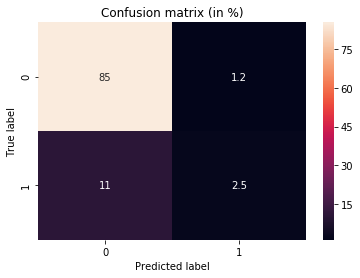

In [10]:
clf_cfmatrix_lr = confusion_matrix(y_test, model_lr_best.predict(X_test))
clf_cfmatrix_lr = 100*clf_cfmatrix_lr/clf_cfmatrix_lr.sum()
disp = sns.heatmap(clf_cfmatrix_lr, annot=True)
disp.set_title("Confusion matrix (in %)")
disp.set_xlabel("Predicted label")
disp.set_ylabel("True label")

### 4 - Support Vector Machine (SVM)

Next, we train a SVM model that hopefully performs better on the dataset

In [12]:
model_svm = svm.SVC(random_state=1)
parameters_svm = {"C":[0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30], "kernel":("poly","sigmoid","rbf")}

clf_svm = GridSearchCV(model_svm, parameters_svm, cv=3, return_train_score=True).fit(X_train, y_train)

In [13]:
clf_svm_results = pd.DataFrame(clf_svm.cv_results_, columns=clf_svm.cv_results_.keys())
print("The best parameter value for C & kernel are {} with an accuracy of {}".format(clf_svm.best_params_, clf_svm.best_score_))
clf_svm_results.head(10)

The best parameter value for C & kernel are {'C': 10, 'kernel': 'rbf'} with an accuracy of 0.8936625215775527


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.011644,0.002719,0.003777,0.000095,0.01,poly,"{'C': 0.01, 'kernel': 'poly'}",0.864169,0.863850,0.863850,0.863956,0.000150,12,0.863850,0.864009,0.864009,0.863956,0.000075
1,0.018222,0.001323,0.013969,0.009482,0.01,sigmoid,"{'C': 0.01, 'kernel': 'sigmoid'}",0.864169,0.863850,0.863850,0.863956,0.000150,12,0.863850,0.864009,0.864009,0.863956,0.000075
2,0.029879,0.009178,0.006848,0.000033,0.01,rbf,"{'C': 0.01, 'kernel': 'rbf'}",0.864169,0.863850,0.863850,0.863956,0.000150,12,0.863850,0.864009,0.864009,0.863956,0.000075
3,0.010169,0.000266,0.003711,0.000029,0.03,poly,"{'C': 0.03, 'kernel': 'poly'}",0.864169,0.863850,0.863850,0.863956,0.000150,12,0.865023,0.864009,0.865182,0.864738,0.000519
4,0.024711,0.010531,0.007259,0.000039,0.03,sigmoid,"{'C': 0.03, 'kernel': 'sigmoid'}",0.864169,0.863850,0.863850,0.863956,0.000150,12,0.863850,0.864009,0.864009,0.863956,0.000075
5,0.016937,0.000256,0.007037,0.000070,0.03,rbf,"{'C': 0.03, 'kernel': 'rbf'}",0.864169,0.863850,0.863850,0.863956,0.000150,12,0.863850,0.864009,0.864009,0.863956,0.000075
6,0.010786,0.000546,0.003735,0.000046,0.1,poly,"{'C': 0.1, 'kernel': 'poly'}",0.868852,0.863850,0.866197,0.866300,0.002044,9,0.870892,0.871043,0.871043,0.870993,0.000071
7,0.018403,0.001481,0.013942,0.009458,0.1,sigmoid,"{'C': 0.1, 'kernel': 'sigmoid'}",0.864169,0.863850,0.863850,0.863956,0.000150,12,0.863850,0.864009,0.864009,0.863956,0.000075
8,0.024297,0.009814,0.007189,0.000137,0.1,rbf,"{'C': 0.1, 'kernel': 'rbf'}",0.864169,0.863850,0.863850,0.863956,0.000150,12,0.863850,0.864009,0.864009,0.863956,0.000075
9,0.011628,0.000683,0.003712,0.000047,0.3,poly,"{'C': 0.3, 'kernel': 'poly'}",0.887588,0.875587,0.877934,0.880370,0.005193,4,0.897887,0.892145,0.900352,0.896795,0.003438


Again, we evaluate our best model

In [14]:
model_svm_best = clf_svm.best_estimator_
clf_report_svm = classification_report(y_test, model_svm_best.predict(X_test))

print(clf_report_svm)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       277
           1       0.71      0.58      0.64        43

    accuracy                           0.91       320
   macro avg       0.83      0.77      0.80       320
weighted avg       0.91      0.91      0.91       320



Text(33.0, 0.5, 'True label')

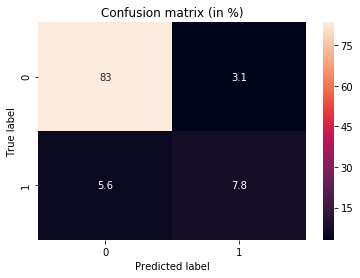

In [15]:
clf_cfmatrix_svm = confusion_matrix(y_test, model_svm_best.predict(X_test))
clf_cfmatrix_svm = 100*clf_cfmatrix_svm/clf_cfmatrix_svm.sum()
disp = sns.heatmap(clf_cfmatrix_svm, annot=True)
disp.set_title("Confusion matrix (in %)")
disp.set_xlabel("Predicted label")
disp.set_ylabel("True label")

### 5 - Conclusion

In conclusion, we have built and optimized two binary classification algorithms, one using logistic regression and one support vector machine. With the former, we achieved an overall 81% accuracy and with the latter a 90% accuracy in separating good from bad wine samples based off their chemical composition.